# Домашнее задание по теме «Табличные данные и визуализация»

# Правила сдачи ДЗ
1) Нельзя удалять существующие ячейки кода

2) Можно дописывать свои ячейки кода

3) Как правило, место для вашего кода дополнительно помечается комментариями

4) Ответ на задачу "из ниоткуда", то есть без прикреплённого кода, дающего ответ, не засчитывается. Исключением являются вопросы "на подумать", в которых вся информация уже известна, и нужно лишь сделать из неё выводы

5) Если не сказано иного, наличие работоспособного кода обязательно. При проверке должна быть возможность воспроизвести все полученные результаты


В этом домашнем задании тебе предстоит работать с данными, включая их загрузку, предварительную обработку, исследовательский анализ и визуализацию. Ты сможешь потренироваться в работе с инструментами анализа данных и сделать выводы на основе датасета.


Тебе нужно выполнить следующие задания:

*   **Установка библиотек.** Убедись, что все необходимые инструменты (например, библиотека Plotly) установлены и готовы к использованию.
*   **Загрузка данных.** Подготовь датасет для дальнейшего анализа.
*   **Исследовательский анализ данных (EDA).** Исследуй основные характеристики данных, выяви пропуски, корреляции и другие ключевые закономерности.
*   **Визуализация данных.** Построй диаграммы и графики для наглядного представления выводов.

В задачах встречаются подсказки и инструкции, чтобы облегчить их выполнение. Обрати внимание, что около каждой задачи указано количество баллов, которое можно получить за её выполнение.

<!-- **Пример**: Какие признаки в датасете являются числовыми и категориальными? **[0.25 балла]** -->

<!-- Готовы погрузиться в мир анализа данных? Тогда приступим! -->

## Установка дополнительных библиотек

In [21]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Импорт библиотек

In [22]:
import pandas as pd
# import polars as pl # Используем для сравнения с Pandas
# не используем, у меня ноут древний
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Используем для построения Plotly-графиков
import time # Используем для замера времени при сравнении Pandas и Polars
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Загрузка данных

In [23]:
!gdown --id 1hOqWeknUFhuotXxczZcIy9sYDO9z38TJ -O Datasets/1.2.csv

/home/rostislav-lokhov/Homeworks/AI/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOqWeknUFhuotXxczZcIy9sYDO9z38TJ
To: /home/rostislav-lokhov/Homeworks/AI/Datasets/1.2.csv
100%|█████████████████████████████████████████| 161k/161k [00:00<00:00, 680kB/s]


В задачах ты будешь работать с [The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon), в котором описаны характеристики покемонов — вымышленных существ из франшизы «Покемон».

In [24]:
df = pd.read_csv('Datasets/1.2.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Задача 1 [0,5 балла]



*   Сколько строк и столбцов содержит скачанный набор данных? **[0, 25 балла]**



In [25]:
print(df.shape)

(801, 41)




*   Какие признаки в датасете являются числовыми и категориальными? **[0,25 балла]**



In [26]:
print(f"Numeric: {df.select_dtypes(include="number").columns}")
print()
print(f"Categorial: {df.select_dtypes(include="object").columns}")

Numeric: Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth',
       'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

Categorial: Index(['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name',
       'type1', 'type2'],
      dtype='object')


> **Подсказка.** Категориальными будут признаки со значением 'object' для Dtype.

## Задача 2 [0,5 балла]



*   В каком столбце больше всего пропусков? Сколько их? **[0,25 балла]**



In [27]:
print(df.isnull().sum()>0)

abilities            False
against_bug          False
against_dark         False
against_dragon       False
against_electric     False
against_fairy        False
against_fight        False
against_fire         False
against_flying       False
against_ghost        False
against_grass        False
against_ground       False
against_ice          False
against_normal       False
against_poison       False
against_psychic      False
against_rock         False
against_steel        False
against_water        False
attack               False
base_egg_steps       False
base_happiness       False
base_total           False
capture_rate         False
classfication        False
defense              False
experience_growth    False
height_m              True
hp                   False
japanese_name        False
name                 False
percentage_male       True
pokedex_number       False
sp_attack            False
sp_defense           False
speed                False
type1                False
t

height_m  type2 percentage_male weight_kg




*   Удали строки с пропусками в признаке, полученном в прошлом пункте. Для этого измени датасет, а не создавай новый. Сколько строк осталось в таблице? **[0,25 балла]**



In [28]:
df.dropna(inplace=True)

> **Подсказка.** Ознакомься с документацией Pandas для функции ['dropna'](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html). Нас особенно интересует параметр 'inplace'.

## Задание 3 [1 балл]



* Сколько легендарных покемонов, которые весят больше чем 100кг?  **[0,33 балла]**



In [29]:
print(df[df['is_legendary']==True].shape[0])

5




*   Какая средняя скорость у покемонов пятого поколения? Результат округлите до двух знаков после запятой **[0,33 балла]**



In [30]:
round(df[df['generation'] == 5]['speed'].mean(), 2)

np.float64(66.37)



*   Существуют ли покемоны третьего поколения, у которых совпадают показатели 'sp_defense' и 'speed'? Если да, то сколько таких покемонов? **[0,33 балла]**



In [31]:
print(df[(df['generation']==3) & (df['sp_defense']==df['speed'])].shape)

(1, 41)


> **Примечание.** 0,33 балла × 3 = 0,99 балла. 0,01 добавляем в подарок!

да, 1

## Задание 4 [3 балла]


*   Построй гистограмму распределения 'defense', используйте 15 бинов. Какие значения встречаются чаше всего? **[1 балл]**

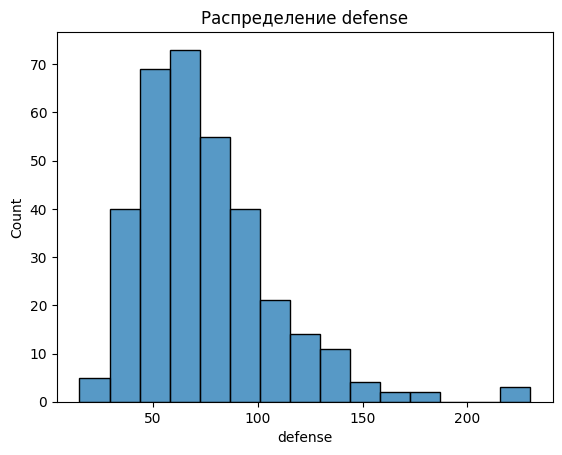

In [32]:
import seaborn as sns
sns.histplot(df['defense'], bins=15)
plt.title(label="Распределение defense")
plt.xlabel(xlabel="defense")
plt.show()



*   Построй barplot среднего значения 'attack' для каждого типа покемонов ('type1'). Какой тип находится на последнем месте? **[1 балл]**



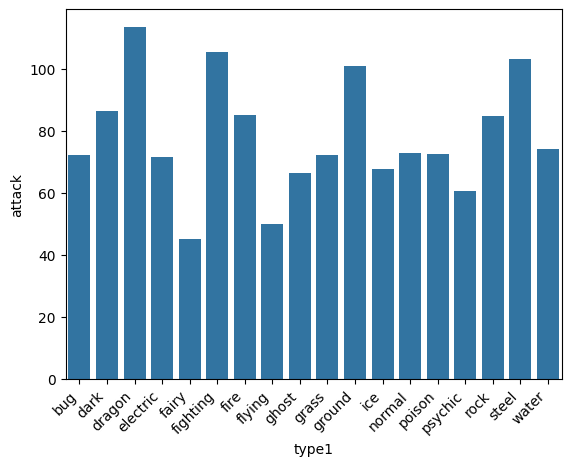

In [33]:
grouped_attack = df.groupby('type1')['attack'].mean().reset_index()
sns.barplot(x='type1', y='attack', data=grouped_attack)
plt.xticks(rotation=45, ha='right')
plt.show()



*   Построй pairplot для признаков 'attack', 'defense', 'hp'. **[1 балл]**


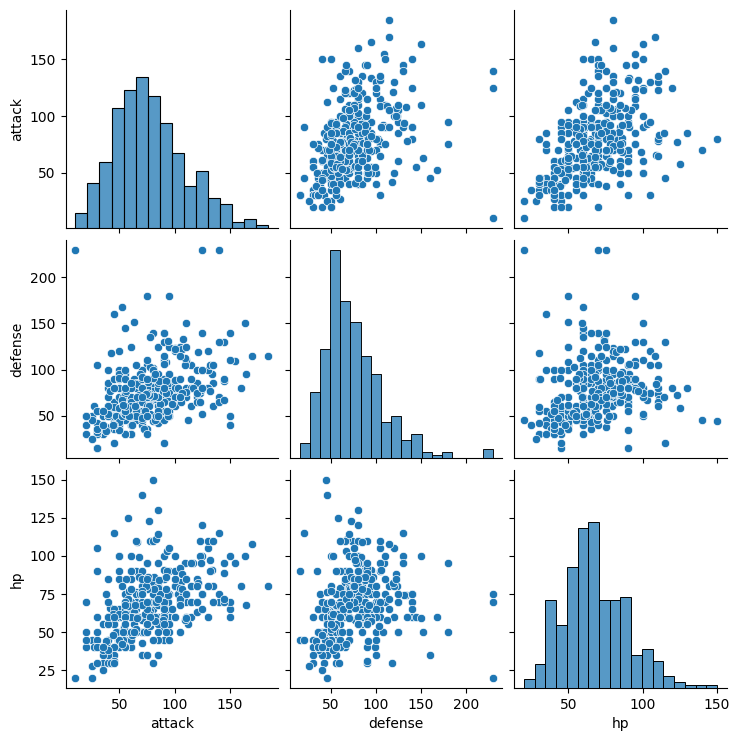

In [34]:
sns.pairplot(data=df[['attack', 'defense', 'hp']])
plt.show()

### Задача 4.1 [0,5 балла]

Какие выводы можно сделать по pairplot-графику, построенному выше? Предложи 2-3 вывода.


*   **Формат вывода.** На графике Х заметно Y, что можно связать с умозаключением Z.
*   **Пример вывода.** На графике Defense/HP заметно, что чем больше у покемона HP, тем ниже его показатель Defense. Это логично, ведь для баланса вселенной покемонов лишь у особенных экземпляров может быть одновременно и высокий показатель защиты, и высокий показатель здоровья.


>**Важно.** Это задание, чтобы подумать и порефлексировать. Преподаватель оценит не сами выводы, а структуру и логику рассуждений. Выдели на эту задачу 15 минут и посмотри, как связаны между собой данные.

**Твой ответ**

1. Заметна положительная корреляция между attack/defense. На мой взгляд это связано с тем, что более сильные покемоны имеют больший defense, однако это не всегда так, что мы и видим на графике

2. Распределение hp является скошенным ближе к 0, связано с тем, что большая часть имеет меньший hp, в то время как наиболее редкие покемоны обладают большим hp

3. Также заметна положительная корреляция между attack/hp. Тут аналогично, более редкие покемоны имеют более лучшие характеристики и более баланснутые соотношения, однако это также не всегда так.

## Задача 5 [3 балла]



*   Найди 5 типов ('type1') с самым высоким минимальным значением 'defense'. В ответе запиши название типов (от большего к меньшему). **[1 балл]**




In [35]:
print(df.groupby('type1')['defense'].min().sort_values(ascending=False)[:5])

type1
fairy       85
fighting    55
steel       50
dragon      45
rock        45
Name: defense, dtype: int64


> **Подсказка.** Попробуй использовать '.sort_values(ascending=False)' для получения результата.



*   Для каждого из трёх найденных типов вычисли [дисперсию](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B) характеристики 'sp_defense'. В ответе запиши значение дисперсии, округлённое до двух знаков после запятой, для типа покемонов, который находится на первом месте в предыдущем пункте. **[1 балл]**



In [36]:
print(round(df[df['type1']=='fairy']['sp_defense'].std(), 2), "--- это ответ") 
print(round(df[df['type1'] == 'fighting']['sp_defense'].std(), 2))
print(round(df[df['type1'] == 'steel']['sp_defense'].std(), 2))
print(round(df[df['type1'] == 'dragon']['sp_defense'].std(), 2))
print(round(df[df['type1'] == 'rock']['sp_defense'].std(), 2))

7.07 --- это ответ
9.95
22.73
30.92
29.44




*   Визуализируй средние значения характеристик ('hp', 'attack', 'defense', 'speed') для пяти типов покемонов из предыдущих пунктов с помощью barplot. У какого типа покемонов самая маленькая средняя защита? **[1 балл]**



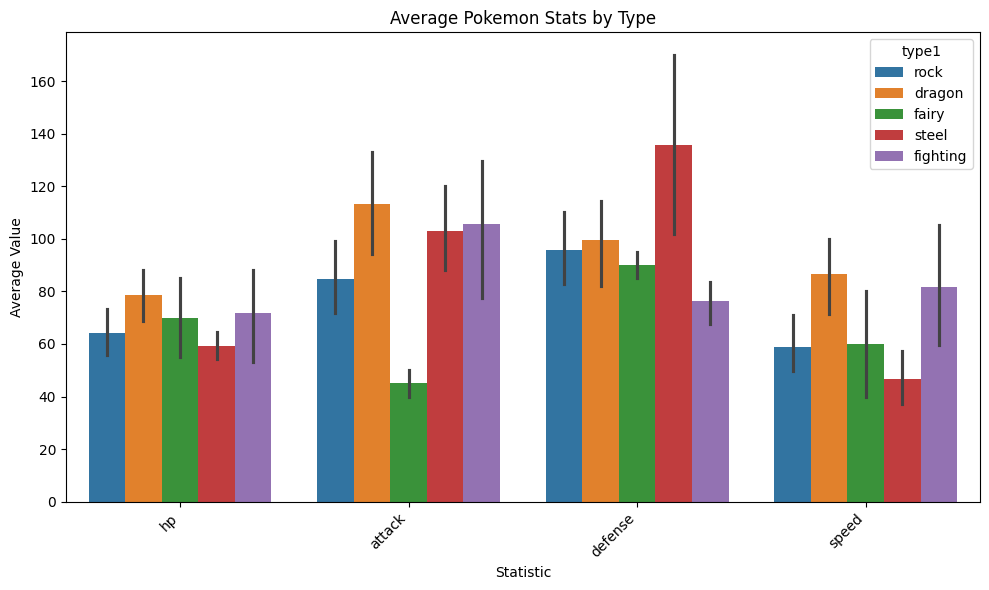

In [37]:
data = df[df['type1'].isin(['fairy', 'fighting', 'steel', 'dragon', 'rock'])]
data_melted = pd.melt(data, id_vars=['type1'], value_vars=['hp', 'attack', 'defense', 'speed'], var_name='stat', value_name='value')

# Now create the barplot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x='stat', y='value', hue='type1', data=data_melted)
plt.title('Average Pokemon Stats by Type')  # Add a title
plt.xlabel('Statistic')  # Label the x-axis
plt.ylabel('Average Value')  # Label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

У дерущихся(fighting)

## Задача 6 [1,5 балла]



*   Найди средние значения характеристик ('hp', 'attack', 'defense', 'speed') для легендарных и нелегендарных покемонов. Верно ли утверждение, что для легендарных покемонов все средние показатели выше? **[0,5 балла]**



Legendary Pokemon:
  HP: 83.80
  Attack: 114.00
  Defense: 97.20
  Speed: 97.80

Common Pokemon:
  HP: 67.61
  Attack: 77.18
  Defense: 74.51
  Speed: 65.62


<Axes: >

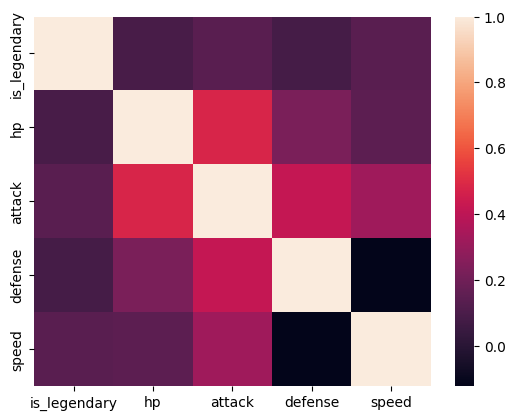

In [38]:
legendary_df = df[df['is_legendary']==True] 
common_df = df[df['is_legendary'] == False]
print("Legendary Pokemon:")
print(f"  HP: {legendary_df['hp'].mean():.2f}")  # Format to 2 decimal places
print(f"  Attack: {legendary_df['attack'].mean():.2f}")
print(f"  Defense: {legendary_df['defense'].mean():.2f}")
print(f"  Speed: {legendary_df['speed'].mean():.2f}")

print("\nCommon Pokemon:")  # Add a separator for clarity
print(f"  HP: {common_df['hp'].mean():.2f}")
print(f"  Attack: {common_df['attack'].mean():.2f}")
print(f"  Defense: {common_df['defense'].mean():.2f}")
print(f"  Speed: {common_df['speed'].mean():.2f}")

sns.heatmap(df[['is_legendary', 'hp', 'attack', 'defense', 'speed']].corr())



*   Построй матрицу корреляции c помощью Plotly для столбцов 'is_legendary', 'hp', 'attack', 'defense', 'speed'. **[1 балл]**

### Задача 6.1 [1 дополнительный балл]



- Что может означать низкая корреляция между Speed и Defense ('0.007')?
- Что может означать корреляция '0.41' между Attack и HP?


**Твой ответ**

1. Тем, что покемон с высокой скоростью будет иметь любую защиту и наоборот. Нет зависимости, иначе говоря
2. Тем, что покемоны с высокой атакой имеют зачастую высокое хп

## Дополнительный материал для изучения

В материале выше сравнивались библиотеки Pandas и Polars, но затрагивались лишь скорость работы и задействованная память. С более обширным разбором можно ознакомиться по ссылке [Pandas vs Polars](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1).

